# ⭐ What this file does ⭐

## ✅ Results of running this file on .xlsx file 
1. this file assumes you have finised manually curating the reach events in the reach_Curator_p38_v3.py file
    - Note: the manually cuated .xlsx file will stil have empty values in some rows, this is not bad, they just need to be dropped / removed. which is what this file does.
    - this fully curated .xlsx file will be backed up here -> Grant_curate/xlsx_backups/mouse_sessionDate_sessionID/completed_manual_curation_backup
2. This file will then drop the empty rows from the .xlsx
    - This makes no modifications outside of this, it only removed rows that have no values for (reachInit, reachMax, reachEnd)
    - Backup location --> Grant_curate/xlsx_backups/mouse_sessionDate_sessionID/final_backup
3. This file then

## ✅ Second set of results from running this file on 
1. this file will use the fully manually curated .xlsx file to make plots and dataframes (.xlsx) files that summarize the results
    - all plots and dataframes (.xlsx) files will be saved here --> G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\Grant_curate\reach_results_analysis\reach10_20250426_session001
    - where each mouse and session gets its own results file


In [15]:
import pandas as pd
import numpy as np
import os
import shutil

## Modify these three variables as needed

In [16]:
# Load mouse_name from .env
import os
from dotenv import load_dotenv

load_dotenv()

# Ensure that the MOUSE_NAME environment variable is set
MOUSE = os.getenv('MOUSE')
if MOUSE is None:
    raise ValueError("MOUSE_NAME environment variable is not set. Please set it to the name of the mouse.")
else:
    print(f"MOUSE loaded: {MOUSE}")

DATE = os.getenv('DATE')
if DATE is None:
    raise ValueError("DATE environment variable is not set. Please set it to the date of the recording.")
else:
    print(f"DATE loaded: {DATE}")

SESSION = os.getenv('SESSION')
if SESSION is None:
    raise ValueError("SESSION environment variable is not set. Please set it to the session number.")
else:
    print(f"SESSION loaded: {SESSION}")

DATE_01 = os.getenv('DATE_01')
if DATE_01 is None:
    raise ValueError("DATE_01 environment variable is not set. Please set it to the date of the recording in MMDD format.")
else:
    print(f"DATE_01 loaded: {DATE_01}")

SESSION_01 = os.getenv('SESSION_01')
if SESSION_01 is None:
    raise ValueError("SESSION_01 environment variable is not set. Please set it to the session number in MMDD format.")
else:
    print(f"SESSION_01 loaded: {SESSION_01}")

DATE_02 = os.getenv('DATE_02')
if DATE_02 is None:
    raise ValueError("DATE_02 environment variable is not set. Please set it to the date of the recording in MMDD format.")
else:
    print(f"DATE_02 loaded: {DATE_02}")

SESSION_02 = os.getenv('SESSION_02')
if SESSION_02 is None:
    raise ValueError("SESSION_02 environment variable is not set. Please set it to the session number in MMDD format.")
else:
    print(f"SESSION_02 loaded: {SESSION_02}")

BEHAVIORAL_FOLDER = os.getenv('BEHAVIORAL_FOLDER')
if BEHAVIORAL_FOLDER is None:
    raise ValueError("BEHAVIORAL_FOLDER environment variable is not set. Please set it to the path of the behavioral recordings.")
else:
    print(f"BEHAVIORAL_FOLDER loaded: {BEHAVIORAL_FOLDER}")

# Construct the recording folder path
root_recording_folder = fr"G:\Grant\neuropixels\kilosort_recordings\{MOUSE}"  # Replace with actual root path
recording_folder = os.path.join(root_recording_folder, "Record Node 103", "experiment1", "recording1", "continuous")

#root_behavior_path = fr"G:\Grant\neuropixels\behavioral_recordings\{BEHAVIORAL_FOLDER}"
# Example values (replace as needed)A
root_behavior_path = fr"G:\Grant\behavior_data\DLC_net\{BEHAVIORAL_FOLDER}"
behavioral_folder = os.path.join(root_behavior_path, DATE, SESSION)

# Check if the recording folder exists
if not os.path.exists(recording_folder):
    raise FileNotFoundError(f"Recording folder not found: {recording_folder}")
else:
    print("Recording folder found:", recording_folder)

MOUSE loaded: reach7_07_2024-12-04_20-57-49_008
DATE loaded: 20241204
SESSION loaded: session006
DATE_01 loaded: NA
SESSION_01 loaded: NA
DATE_02 loaded: NA
SESSION_02 loaded: NA
BEHAVIORAL_FOLDER loaded: grant_reach7_swingDoor-christie
Recording folder found: G:\Grant\neuropixels\kilosort_recordings\reach7_07_2024-12-04_20-57-49_008\Record Node 103\experiment1\recording1\continuous


In [17]:
root_path = r'G:\Grant\behavior_data\DLC_net' # change this to your root path where all the analysis folder live, i currently use is G:\Grant\behavior_data\DLC_net

root_folder = BEHAVIORAL_FOLDER # change this to your root folder for one specfic mouse (this should contain multiple sessions)


SESSION_OPTIONS = [f"{DATE}_{SESSION}", f"{DATE_01}_{SESSION_01}", f"{DATE_02}_{SESSION_02}"]
# Set the specific mouse session to analyze

session_info = SESSION_OPTIONS[0] # change this to the session you want to analyze
print(session_info)

20241204_session006


### Create new session_option for each session
- class that lets you load data for specific mouse sesssion

In [18]:
main_path = rf'{root_path}\{root_folder}'
print(f'main_path: {main_path}')

class select_mouse_session:
    def __init__(self, mouse, session_date, session_ID):
        self.mouse = mouse
        self.session_date = session_date
        self.session_ID = session_ID

    def __repr__(self):
        return f"Mouse: {self.mouse}, Session Date: {self.session_date}, Session ID: {self.session_ID}"
    
    def get_mouse_session_files(self):
        mouse_session = f"{self.mouse}_{self.session_date}_{self.session_ID}"
        xlsx_file = rf'{main_path}\Grant_curate\{self.session_date}_christielab_{self.session_ID}.xlsx'
        txt_file = rf"{main_path}\videos\{self.session_date}\christielab\{self.session_ID}\{self.session_date}_christielab_{self.session_ID}_events_shifted.txt"
        xlsx_orig = rf'{main_path}\Grant_curate\xlsx_backups\curator_direct_backup\{self.session_date}_christielab_{self.session_ID}.xlsx'
        
        return xlsx_file, txt_file, xlsx_orig
    
    def get_mouse_info(self):
        mouse_info = {
            'mouse': self.mouse,
            'session_date': self.session_date,
            'session_ID': self.session_ID
        }
        return mouse_info
    

# Strip the session info to get the session date and ID
session_date = session_info.split('_')[0]
session_ID = session_info.split('_')[1]

# Strip the mouse name from the root folder
mouse = root_folder.split('_')[1]

# Create an instance of the class with the mouse name, session date, and session ID
class_intsance = select_mouse_session(mouse=mouse, session_date=session_date, session_ID=session_ID)

# Get the mouse session files and info
xlsx_file, txt_file, xlsx_orig = class_intsance.get_mouse_session_files()
mouse_info = class_intsance.get_mouse_info()

# Print the results
print(f'mouse_info: {mouse_info}')
print(f'xlsx_file: {xlsx_file}')

main_path: G:\Grant\behavior_data\DLC_net\grant_reach7_swingDoor-christie
mouse_info: {'mouse': 'reach7', 'session_date': '20241204', 'session_ID': 'session006'}
xlsx_file: G:\Grant\behavior_data\DLC_net\grant_reach7_swingDoor-christie\Grant_curate\20241204_christielab_session006.xlsx


In [20]:
session_date = mouse_info['session_date']
session_ID = mouse_info['session_ID']
mouse = mouse_info['mouse']
session_save_name = f"{mouse}_{session_date}_{session_ID}"
print('⭐======================================⭐')
print(f'session_save_name: {session_save_name}')
print('')
print(f'mouse: {mouse}')
print(f'session_date: {session_date}')
print(f'session_ID: {session_ID}')


    # ---- Step 1: Make a backup in curator_backup folder
original_dir = os.path.dirname(xlsx_file)
backup_dir = os.path.join(original_dir, 'xlsx_backups',session_save_name,'reach_curator_direct_backup')
os.makedirs(backup_dir, exist_ok=True)
print(f'original_dir: {original_dir}')
print(f'backup_dir: {backup_dir}')
print('⭐======================================⭐')


⭐======================================⭐
session_save_name: reach7_20241204_session006

mouse: reach7
session_date: 20241204
session_ID: session006
original_dir: G:\Grant\behavior_data\DLC_net\grant_reach7_swingDoor-christie\Grant_curate
backup_dir: G:\Grant\behavior_data\DLC_net\grant_reach7_swingDoor-christie\Grant_curate\xlsx_backups\reach7_20241204_session006\reach_curator_direct_backup
⭐======================================⭐


## Checking if you have already analyzed this session
- if you have, the code is going to stop you from re-analyzing it by KILLING the keneral
- you you do want to overwrite these files --> you need to re-run from the top and skip this cell

In [22]:
final_df_backup = os.path.join(os.path.dirname(xlsx_file), 'xlsx_backups',session_save_name ,'final_backup')
final_df_backup_file_path = os.path.join(final_df_backup, os.path.basename(xlsx_file))

print('')
if os.path.exists(final_df_backup_file_path):
    print('⚠️ Looks like you have already completed the final curation for this session ⚠️')
    print('❌ Therefore, in an effort to prevent overwriting any files, the script changed is going to KILL the kernal (sorry not sorry)❌')
    print('')
    print(f'final_df_backup_file_path: {final_df_backup_file_path}')
    print('')
    print('===========================================')
    print(' ✅ if you actually want to run this script on this session then simply skip running this cell next time ✅')
    print('===========================================')    
    exit()

print('✅ Looks like you have not completed the final curation for this session yet ✅')
print('⭐=============== Therefore you should continue running this file =======================⭐')


✅ Looks like you have not completed the final curation for this session yet ✅
⭐=============== Therefore you should continue running this file =======================⭐


In [23]:

class modify_curator_xlsx_file(object):
    def __init__(self, xlsx_file, txt_file,save_df=True):
        self.txt_file = txt_file
        self.xlsx_file = xlsx_file
        self.save_df = save_df
    
    def load_orig_xlsx_file(self):
        """
        Load the original xlsx file.
        """
        original_dir = os.path.dirname(self.xlsx_file)
        backup_dir = os.path.join(original_dir, 'xlsx_backups',session_save_name ,'reach_curator_direct_backup')
        backup_file_path = os.path.join(backup_dir, os.path.basename(self.xlsx_file))

        df_orig = pd.read_excel(backup_file_path)
        return df_orig, backup_file_path
    
    def load_added_rows_xlsx(self):
        """
        Load the added rows xlsx file.
        """
        original_dir = os.path.dirname(self.xlsx_file)
        backup_added_rows = os.path.join(original_dir, 'xlsx_backups',session_save_name ,'added_missing_rows_backup')
        backup_added_rows_file_path = os.path.join(backup_added_rows, os.path.basename(self.xlsx_file))

        df_added_rows = pd.read_excel(backup_added_rows_file_path)

        return df_added_rows, backup_added_rows_file_path

    
    def drop_empty_reach_rows(self):
    
        df = pd.read_excel(self.xlsx_file)
        # back up the newly created xlsx file
        backup_dir_02 = os.path.join(os.path.dirname(self.xlsx_file), 'xlsx_backups',session_save_name ,'completed_manual_curation_backup')
        os.makedirs(backup_dir_02, exist_ok=True)
        backup_file_path_02 = os.path.join(backup_dir_02, os.path.basename(self.xlsx_file))

        final_df_backup = os.path.join(os.path.dirname(self.xlsx_file), 'xlsx_backups',session_save_name ,'final_backup')
        os.makedirs(final_df_backup, exist_ok=True)
        final_df_backup_file_path = os.path.join(final_df_backup, os.path.basename(self.xlsx_file))

        if os.path.exists(backup_file_path_02):
            print(f"⚠️Warning: Backup file already exists at {backup_file_path_02}⚠️")
            print('❌ Stopping the script to avoid overwriting the backup file ❌')
            return df, backup_file_path_02 
        else:
            # Copy the original file to the backup directory
            shutil.copy2(self.xlsx_file, backup_file_path_02)
            print(f"✅ Backup saved to: {backup_file_path_02}")
        """
        Drop specified rows from the DataFrame.
        """
        # Drop bad rows
        df = df.dropna(subset=['reachInit']).reset_index(drop=True)
        # save the DataFrame to the same xlsx file
        if self.save_df:
            df.to_excel(self.xlsx_file, index=False)
            df.to_excel(final_df_backup_file_path, index=False)
            print(f"✅ Final xlsx saved to: {self.xlsx_file}")
            print(f"✅ Final merged Excel saved to: {self.xlsx_file}")   
            
        return df, backup_file_path_02

    def load_final_xlsx(self):
        """
        Load the combined xlsx file.
        """
        final_df_backup = os.path.join(os.path.dirname(self.xlsx_file), 'xlsx_backups',session_save_name ,'final_backup')
        os.makedirs(final_df_backup, exist_ok=True)
        final_df_backup_file_path = os.path.join(final_df_backup, os.path.basename(self.xlsx_file))

        df_final = pd.read_excel(self.xlsx_file)
        df_final_copy = pd.read_excel(final_df_backup_file_path)

        return df_final, self.xlsx_file, df_final_copy, final_df_backup_file_path
    
    def overwrite_final_df(self):
        #if you made more changes to the xlsx file, you can overwrite the final_df_backup_file_path
        final_df_backup = os.path.join(os.path.dirname(self.xlsx_file), 'xlsx_backups',session_save_name ,'final_backup')
        os.makedirs(final_df_backup, exist_ok=True)

        # back up the newly created xlsx file
        final_df_backup_file_path = os.path.join(final_df_backup, os.path.basename(self.xlsx_file))
        df_final = pd.read_excel(self.xlsx_file)
        df_final.to_excel(final_df_backup_file_path, index=False)
        print(f"✅ Final xlsx saved to: {final_df_backup_file_path}")
        
        return df_final, final_df_backup_file_path
    


In [24]:
safe_fail = True


In [25]:
if safe_fail:
    mouse_sessions = modify_curator_xlsx_file(xlsx_file, txt_file,save_df=True)
    df_manual_curation, df_manual_curation_path = mouse_sessions.drop_empty_reach_rows()
else:
    safe_fail = True
    print(f"⚠️Warning: safe_fail actviated⚠️")
    print('if you want to run the code, please re-run this cell')


✅ Backup saved to: G:\Grant\behavior_data\DLC_net\grant_reach7_swingDoor-christie\Grant_curate\xlsx_backups\reach7_20241204_session006\completed_manual_curation_backup\20241204_christielab_session006.xlsx
✅ Final xlsx saved to: G:\Grant\behavior_data\DLC_net\grant_reach7_swingDoor-christie\Grant_curate\20241204_christielab_session006.xlsx
✅ Final merged Excel saved to: G:\Grant\behavior_data\DLC_net\grant_reach7_swingDoor-christie\Grant_curate\20241204_christielab_session006.xlsx


## ⚠️ If you have made changes to the xlsx file, you can overwrite the final_df_backup file ⚠️


In [10]:
## If you have made changes to the xlsx file, you can overwrite the final_df_backup_file_path
Overwrite_final_df = False

if Overwrite_final_df:
    mouse_sessions = modify_curator_xlsx_file(xlsx_file, txt_file,save_df=True)
    df_final, final_df_backup_file_path = mouse_sessions.overwrite_final_df()
else:
    safe_fail = True
    print(f"⚠️Warning: stopping overwriting the final_df_backup⚠️")
    print('if you want to overwrite the final_df_backup,set Overwrite_final_df = True')


⚠️Warning: stopping overwriting the final_df_backup⚠️
if you want to overwrite the final_df_backup,set Overwrite_final_df = True


### Load in all the different dataframes
- (1) df_orig ---> Load the original xlsx file, made by reach_curator_py38_v3.py upon launching a video session for first time
- (2) df_added_missing_rows ---> Load the added rows xlsx file, made by modify_reach_curator.xlsx when running the original .xlsx file through it
- (3) df_final --> Load the final xlsx file, made by manually curating all reach events inside the reach_curator_py38_v3.py, and empty rows removed by this file

In [26]:
df_orig, df_orig_path = mouse_sessions.load_orig_xlsx_file()
df_added_missing_rows, df_added_rows_path = mouse_sessions.load_added_rows_xlsx()
df_final, df_final_path, df_final_copy, final_df_backup_file_path  = mouse_sessions.load_final_xlsx()

print(f'loading df_orig from --> {df_orig_path}')
print(f'loading df_added_rows from --> {df_added_rows_path}')
print(f'loading df_final from--> {df_final_path}')

FileNotFoundError: [Errno 2] No such file or directory: 'G:\\Grant\\behavior_data\\DLC_net\\grant_reach7_swingDoor-christie\\Grant_curate\\xlsx_backups\\reach7_20241204_session006\\added_missing_rows_backup\\20241204_christielab_session006.xlsx'

### Verify df_final has no empty reach rows

In [540]:
df_final.head(10)

,T6000,T5000,reachInit,reachMax,reachEnd,stim,behaviors,pellet_delivery,pellet_detected,ReachType
0,1816,2100,2185,2202,2205,0,missed,2098,1869,short
1,4229,4661,4664,4689,4701,0,dropped,4659,4283,short
2,6725,6858,6873,6889,6918,0,consumed_first,6856,6779,on_pellet
3,8911,9414,9428,9448,9459,0,missed,9412,8999,short
4,12129,12336,12353,12374,12385,0,missed,12333,12182,short
5,14405,14795,14810,14833,14855,0,consumed_first,14793,14492,above
6,16892,17207,17221,17240,17245,0,dropped,17205,16978,short
7,19305,19441,19451,19464,19472,0,missed,19439,19362,short
8,23610,24047,24060,24080,24086,0,dropped,24044,23664,above
9,28216,28351,28367,28381,28384,0,dropped,28349,28273,above


In [541]:
df_final_copy.head(10)

,T6000,T5000,reachInit,reachMax,reachEnd,stim,behaviors,pellet_delivery,pellet_detected,ReachType
0,1816,2100,2185,2202,2205,0,missed,2098,1869,short
1,4229,4661,4664,4689,4701,0,dropped,4659,4283,short
2,6725,6858,6873,6889,6918,0,consumed_first,6856,6779,on_pellet
3,8911,9414,9428,9448,9459,0,missed,9412,8999,short
4,12129,12336,12353,12374,12385,0,missed,12333,12182,short
5,14405,14795,14810,14833,14855,0,consumed_first,14793,14492,above
6,16892,17207,17221,17240,17245,0,dropped,17205,16978,short
7,19305,19441,19451,19464,19472,0,missed,19439,19362,short
8,23610,24047,24060,24080,24086,0,dropped,24044,23664,above
9,28216,28351,28367,28381,28384,0,dropped,28349,28273,above


#### Verify how many reaches you found during the manual curation
- Vs. how many reaches the find_reach_events function found

In [524]:
df_orig_shape = df_orig.shape[0]
df_added_rows_shape = df_added_missing_rows.shape[0]
df_final_shape = df_final.shape[0]
# Count the number of reach events
print(f"Reachs found by find_reach_events: {len(df_orig)}")
print(f"Reachs found by manual curation: {len(df_final)}")
print('')
print(f'❌ Reaches Missed by find_reach_events: {df_final_shape-df_orig_shape}')


Reachs found by find_reach_events: 56
Reachs found by manual curation: 56

❌ Reaches Missed by find_reach_events: 0


### Create the behavior & reachType dictionaries and dataframes
#### behavior_results
- count --> shows the count of how many reaches had that specifc behavior
- reachType_rate --> shows the percent of total reachs each behavior makes up

#### reachType_results
- count --> shows the count of how many reaches had that specifc reachType
- reachType_rate --> shows the percent of total reachs each reachType makes up

In [525]:
total_reach_events = df_final.shape[0]

behaviors = df_final['behaviors'].unique()
print(f'Unique behaviors: {behaviors}')
ReachTypes = df_final['ReachType'].unique()
print(f'Unique ReachTypes: {ReachTypes}')

behavior_results = {}
for behavior in behaviors:
    # count the number of occurrences of each behavior
    behavior_count = df_final[df_final['behaviors']==behavior]
    behavior_count = int(len(behavior_count))
    # calculate the rate of each behavior
    behavior_rate = (behavior_count/df_final_shape)*100
    behavior_rate = round(behavior_rate, 2)
    # Update the dictionary with the behavior and its percentage
    behavior_results[behavior] = {
        'behavior': behavior,
        'count': behavior_count,
        'behavior_rate': behavior_rate
    }


reachType_results = {}
for reachType in ReachTypes:
    reachType = str(reachType)
    # count the number of occurrences of each behavior
    reachType_count = df_final[df_final['ReachType']==reachType]
    reachType_count = int(len(reachType_count))
    # calculate the rate of each behavior
    reachType_rate = (reachType_count/df_final_shape)*100
    reachType_rate = round(reachType_rate, 2)
    reachType_results[reachType] = {
        'reachType': reachType,
        'count': reachType_count,
        'reachType_rate': reachType_rate,
    }


reachType_results_df = pd.DataFrame(reachType_results).T
reachType_results_df = reachType_results_df.reset_index()
reachType_results_df = reachType_results_df.drop(columns=['index'])
reachType_results_df['count'] = reachType_results_df['count'].astype(int)   


behavior_results_df = pd.DataFrame(behavior_results).T
behavior_results_df = behavior_results_df.reset_index()
behavior_results_df = behavior_results_df.drop(columns=['index'])
behavior_results_df['count'] = behavior_results_df['count'].astype(int)   

Unique behaviors: ['dropped' 'missed' 'consumed' 'none']


KeyError: 'ReachType'

In [473]:
behavior_results_df

,behavior,count,behavior_rate
0,missed,13,25.0
1,dropped,24,46.15
2,consumed_first,15,28.85


In [474]:
reachType_results_df

,reachType,count,reachType_rate
0,short,16,30.77
1,on_pellet,14,26.92
2,above,19,36.54
3,left,2,3.85
4,nan,0,0.0


### create lists that show which reach numbers are associated with which behavior type and reachType

In [475]:
# Get unique behaviors and ReachTypes
behaviors = df_final['behaviors'].unique()
ReachTypes = df_final['ReachType'].unique()

# Initialize storage for each ReachType
associated_reach_dic = {}

# Loop over dataframe
for num, row in df_final.iterrows():
    rtype = row['ReachType']

    # Make sure this ReachType has an entry
    if rtype not in associated_reach_dic:
        associated_reach_dic[rtype] = {
            'reach_numbers': []
        }

    # Add this row index to that ReachType’s list
    associated_reach_dic[rtype]['reach_numbers'].append(num)

# Show the result
associated_reach_dic.keys()
associated_reach_dic.values()
# access the values for each key
for key, value in associated_reach_dic.items():
    print(f"Key: {key}, Value: {value}")

######################

print('')
print('=================================')
print('')
# Get unique behaviors and ReachTypes
behaviors = df_final['behaviors'].unique()

# Initialize storage for each ReachType
associated_reach_behavior_dic = {}

# Loop over dataframe
for num, row in df_final.iterrows():
    rtype = row['behaviors']

    # Make sure this ReachType has an entry
    if rtype not in associated_reach_behavior_dic:
        associated_reach_behavior_dic[rtype] = {
            'reach_numbers': []
        }

    # Add this row index to that ReachType’s list
    associated_reach_behavior_dic[rtype]['reach_numbers'].append(num)

# Show the result
associated_reach_behavior_dic.keys()
associated_reach_behavior_dic.values()
# access the values for each key
for key, value in associated_reach_behavior_dic.items():
    print(f"Key: {key}, Value: {value}")

Key: short, Value: {'reach_numbers': [0, 1, 3, 4, 6, 7, 10, 16, 20, 21, 33, 34, 41, 42, 44, 45]}
Key: on_pellet, Value: {'reach_numbers': [2, 11, 13, 15, 18, 26, 28, 31, 35, 36, 38, 39, 46, 50]}
Key: above, Value: {'reach_numbers': [5, 8, 9, 12, 17, 22, 23, 24, 25, 27, 29, 30, 32, 40, 43, 47, 48, 49, 51]}
Key: left, Value: {'reach_numbers': [14, 19]}
Key: nan, Value: {'reach_numbers': [37]}


Key: missed, Value: {'reach_numbers': [0, 3, 4, 7, 14, 16, 19, 20, 25, 27, 32, 40, 42]}
Key: dropped, Value: {'reach_numbers': [1, 6, 8, 9, 10, 12, 17, 21, 22, 23, 24, 29, 30, 33, 34, 36, 38, 43, 44, 45, 46, 47, 48, 51]}
Key: consumed_first, Value: {'reach_numbers': [2, 5, 11, 13, 15, 18, 26, 28, 31, 35, 37, 39, 41, 49, 50]}


In [476]:
# Loop through both keys and values from the dictionary
for key, val in associated_reach_dic.items():
    print(f"Key: {key}, Value: {val}")  
    
    # Filter the DataFrame for matching reachType
    match_rows = reachType_results_df[reachType_results_df['reachType'] == key]

    # Assign the reach_numbers list to the new column for matching rows
    reachType_results_df.loc[reachType_results_df['reachType'] == key, 'associated_reach_numbers'] = str(val['reach_numbers'])

print('')
print('=================================')
print('')
# Loop through both keys and values from the dictionary
for key, val in associated_reach_behavior_dic.items():
    print(f"Key: {key}, Value: {val}")  
    
    # Filter the DataFrame for matching reachType
    match_rows = behavior_results_df[behavior_results_df['behavior'] == key]

    # Assign the reach_numbers list to the new column for matching rows
    behavior_results_df.loc[behavior_results_df['behavior'] == key, 'associated_reach_numbers'] = str(val['reach_numbers'])


Key: short, Value: {'reach_numbers': [0, 1, 3, 4, 6, 7, 10, 16, 20, 21, 33, 34, 41, 42, 44, 45]}
Key: on_pellet, Value: {'reach_numbers': [2, 11, 13, 15, 18, 26, 28, 31, 35, 36, 38, 39, 46, 50]}
Key: above, Value: {'reach_numbers': [5, 8, 9, 12, 17, 22, 23, 24, 25, 27, 29, 30, 32, 40, 43, 47, 48, 49, 51]}
Key: left, Value: {'reach_numbers': [14, 19]}
Key: nan, Value: {'reach_numbers': [37]}


Key: missed, Value: {'reach_numbers': [0, 3, 4, 7, 14, 16, 19, 20, 25, 27, 32, 40, 42]}
Key: dropped, Value: {'reach_numbers': [1, 6, 8, 9, 10, 12, 17, 21, 22, 23, 24, 29, 30, 33, 34, 36, 38, 43, 44, 45, 46, 47, 48, 51]}
Key: consumed_first, Value: {'reach_numbers': [2, 5, 11, 13, 15, 18, 26, 28, 31, 35, 37, 39, 41, 49, 50]}


### Check if the behavior and reachType dataframes have added the associated_reach_numbers
- associated_reach_numbers = [reaches that had that specfic behavior or reachType]

In [477]:
reachType_results_df


,reachType,count,reachType_rate,associated_reach_numbers
0,short,16,30.77,"[0, 1, 3, 4, 6, 7, 10, 16, 20, 21, 33, 34, 41,..."
1,on_pellet,14,26.92,"[2, 11, 13, 15, 18, 26, 28, 31, 35, 36, 38, 39..."
2,above,19,36.54,"[5, 8, 9, 12, 17, 22, 23, 24, 25, 27, 29, 30, ..."
3,left,2,3.85,"[14, 19]"
4,nan,0,0.0,NaN


In [478]:
behavior_results_df

,behavior,count,behavior_rate,associated_reach_numbers
0,missed,13,25.0,"[0, 3, 4, 7, 14, 16, 19, 20, 25, 27, 32, 40, 42]"
1,dropped,24,46.15,"[1, 6, 8, 9, 10, 12, 17, 21, 22, 23, 24, 29, 3..."
2,consumed_first,15,28.85,"[2, 5, 11, 13, 15, 18, 26, 28, 31, 35, 37, 39,..."


In [479]:
# Add engineered timing features to df_final
df_final_reachDuration = df_final

df_final_reachDuration['reachDuration'] = df_final_reachDuration['reachEnd'] - df_final_reachDuration['reachInit']
df_final_reachDuration['movementTime'] = df_final_reachDuration['reachMax'] - df_final_reachDuration['reachInit']
df_final_reachDuration['ReachInit_latency'] = df_final_reachDuration['reachInit'] - df_final_reachDuration['T5000']
df_final_reachDuration.head(5)

,T6000,T5000,reachInit,reachMax,reachEnd,stim,behaviors,pellet_delivery,pellet_detected,ReachType,reachDuration,movementTime,ReachInit_latency
0,1816,2100,2185,2202,2205,0,missed,2098,1869,short,20,17,85
1,4229,4661,4664,4689,4701,0,dropped,4659,4283,short,37,25,3
2,6725,6858,6873,6889,6918,0,consumed_first,6856,6779,on_pellet,45,16,15
3,8911,9414,9428,9448,9459,0,missed,9412,8999,short,31,20,14
4,12129,12336,12353,12374,12385,0,missed,12333,12182,short,32,21,17


## ✅ Save dateframe results to csv file

In [480]:
save_results_path = os.path.join(os.path.dirname(xlsx_file),'reach_results_analysis',session_save_name)

if os.path.exists(save_results_path):
    print(f"⚠️Warning: Directory already exists at {save_results_path}⚠️")
else:
    os.makedirs(save_results_path, exist_ok=True)
    print(f'✅ created directory to save results to: {save_results_path}')

reachType_results_path = os.path.join(save_results_path, 'reachType_results.csv')
behavior_results_path = os.path.join(save_results_path, 'behavior_results.csv')
df_final_reachDuration_path = os.path.join(save_results_path, 'df_final_reachDuration.csv')

# Save the DataFrame to a CSV file
if os.path.exists(reachType_results_path):
    print(f"⚠️Warning: reachType_results file already exists at {reachType_results_path}⚠️")
else:
    reachType_results_df.to_csv(reachType_results_path, index=False)
    print(f"✅ Final Excel saved to: {reachType_results_path}")

if os.path.exists(behavior_results_path):
    print(f"⚠️Warning: reachType_results file already exists at {behavior_results_path}⚠️")
else:
    behavior_results_df.to_csv(behavior_results_path, index=False)
    print(f"✅ Final Excel saved to: {behavior_results_path}")

if os.path.exists(df_final_reachDuration_path):
    print(f"⚠️Warning: reachType_results file already exists at {df_final_reachDuration_path}⚠️")
else:
    df_final_reachDuration.to_csv(df_final_reachDuration_path, index=False)
    print(f"✅ Final Excel saved to: {df_final_reachDuration_path}")





⚠️Warning: Directory already exists at G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\Grant_curate\reach_results_analysis\reach10_20250426_session001⚠️
⚠️Warning: reachType_results file already exists at G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\Grant_curate\reach_results_analysis\reach10_20250426_session001\reachType_results.csv⚠️
⚠️Warning: reachType_results file already exists at G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\Grant_curate\reach_results_analysis\reach10_20250426_session001\behavior_results.csv⚠️
⚠️Warning: reachType_results file already exists at G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\Grant_curate\reach_results_analysis\reach10_20250426_session001\df_final_reachDuration.csv⚠️


### Verify the dataframes where saved, and can be loaded in

In [341]:
behavior_results_df_load = pd.read_csv(behavior_results_path)
reachType_results_df_load = pd.read_csv(reachType_results_path)
df_final_reachDuration_load = pd.read_csv(df_final_reachDuration_path)

In [342]:
behavior_results_df_load

,behavior,count,behavior_rate,associated_reach_numbers
0,missed,13,25.00,"[0, 3, 4, 7, 14, 16, 19, 20, 25, 27, 32, 40, 42]"
1,dropped,24,46.15,"[1, 6, 8, 9, 10, 12, 17, 21, 22, 23, 24, 29, 3..."
2,consumed_first,15,28.85,"[2, 5, 11, 13, 15, 18, 26, 28, 31, 35, 37, 39,..."


In [343]:
reachType_results_df_load

,reachType,count,reachType_rate,associated_reach_numbers
0,short,16,30.77,"[0, 1, 3, 4, 6, 7, 10, 16, 20, 21, 33, 34, 41,..."
1,on_pellet,14,26.92,"[2, 11, 13, 15, 18, 26, 28, 31, 35, 36, 38, 39..."
2,above,19,36.54,"[5, 8, 9, 12, 17, 22, 23, 24, 25, 27, 29, 30, ..."
3,left,2,3.85,"[14, 19]"
4,NaN,0,0.00,NaN


In [344]:
df_final_reachDuration_load.head()

,T6000,T5000,reachInit,reachMax,reachEnd,stim,behaviors,pellet_delivery,pellet_detected,ReachType,reachDuration,movementTime,ReachInit_latency
0,1816,2100,2185,2202,2205,0,missed,2098,1869,short,20,17,85
1,4229,4661,4664,4689,4701,0,dropped,4659,4283,short,37,25,3
2,6725,6858,6873,6889,6918,0,consumed_first,6856,6779,on_pellet,45,16,15
3,8911,9414,9428,9448,9459,0,missed,9412,8999,short,31,20,14
4,12129,12336,12353,12374,12385,0,missed,12333,12182,short,32,21,17


# ⭐ Plotting ⭐

## ✅ Results from running this half of the file 
1. this file will use the final manually curated .xlsx file (df_final) to make plots and dataframes (.xlsx) files that summarize the behavior and reachType results
    - All plots and dataframes (.xlsx) will be saved here --> G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\Grant_curate\reach_results_analysis\mouse_sessionDate_sessionID
    - Each mouse and session gets its own results file

In [543]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.patches as patches
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [544]:
behavior_results_df_load = pd.read_csv(behavior_results_path)
reachType_results_df_load = pd.read_csv(reachType_results_path)


In [545]:
behavior_results_df_load

,behavior,count,behavior_rate,associated_reach_numbers
0,missed,13,25.00,"[0, 3, 4, 7, 14, 16, 19, 20, 25, 27, 32, 40, 42]"
1,dropped,24,46.15,"[1, 6, 8, 9, 10, 12, 17, 21, 22, 23, 24, 29, 3..."
2,consumed_first,15,28.85,"[2, 5, 11, 13, 15, 18, 26, 28, 31, 35, 37, 39,..."


In [348]:
reachType_results_df_load

,reachType,count,reachType_rate,associated_reach_numbers
0,short,16,30.77,"[0, 1, 3, 4, 6, 7, 10, 16, 20, 21, 33, 34, 41,..."
1,on_pellet,14,26.92,"[2, 11, 13, 15, 18, 26, 28, 31, 35, 36, 38, 39..."
2,above,19,36.54,"[5, 8, 9, 12, 17, 22, 23, 24, 25, 27, 29, 30, ..."
3,left,2,3.85,"[14, 19]"
4,NaN,0,0.00,NaN


In [349]:
plot_save_path = os.path.join(save_results_path, 'plots')
if not os.path.exists(plot_save_path):
    os.makedirs(plot_save_path, exist_ok=True)
    print(f'✅ created directory to save plots to: {plot_save_path}')
else:
    print(f"⚠️ Plot Directory already exists at {plot_save_path}")


✅ created directory to save plots to: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie-2025-04-21\Grant_curate\reach_results_analysis\reach10_20250426_session001\plots


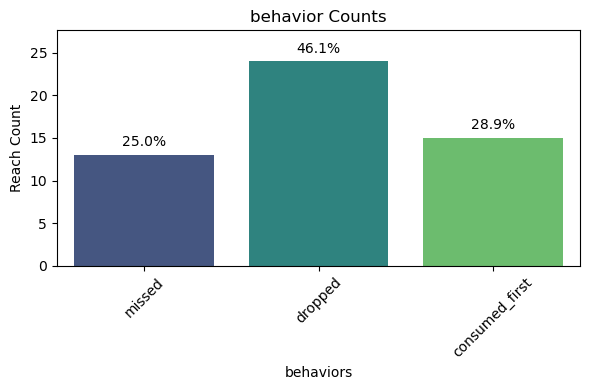

In [350]:
file_name = 'behavior_counts.png'

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=behavior_results_df_load, x='behavior', y='count', palette='viridis')
plt.title('behavior Counts')
plt.xlabel('behaviors')
plt.ylabel('Reach Count')
plt.xticks(rotation=45)

#plt.grid(axis='y') add gray lines

# Add reachType_rate labels (already calculated)
for i, p in enumerate(ax.patches):
    rate = behavior_results_df_load.loc[i, 'behavior_rate']
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, f'{rate:.1f}%', ha='center')

max_count = behavior_results_df_load['count'].max()
plt.ylim(0, max_count * 1.15)  # 15% taller than highest bar
plt.tight_layout()


if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)
    
plt.show()


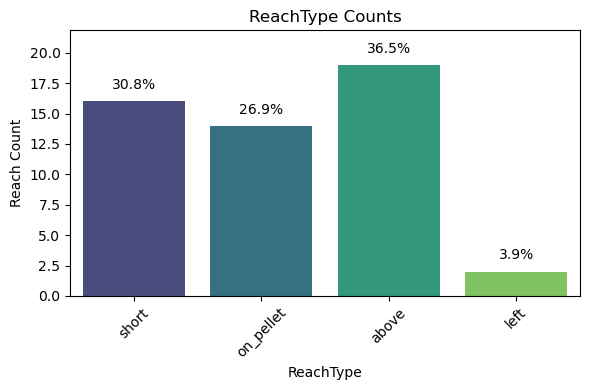

In [351]:
file_name = 'reachType_counts.png'

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=reachType_results_df_load, x='reachType', y='count', palette='viridis')
plt.title('ReachType Counts')
plt.xlabel('ReachType')
plt.ylabel('Reach Count')
plt.xticks(rotation=45)

#plt.grid(axis='y') add gray lines

# Add reachType_rate labels (already calculated)
for i, p in enumerate(ax.patches):
    rate = reachType_results_df_load.loc[i, 'reachType_rate']
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, f'{rate:.1f}%', ha='center')

max_count = reachType_results_df_load['count'].max()
plt.ylim(0, max_count * 1.15)  # 15% taller than highest bar
plt.tight_layout()

if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)
    
plt.show()

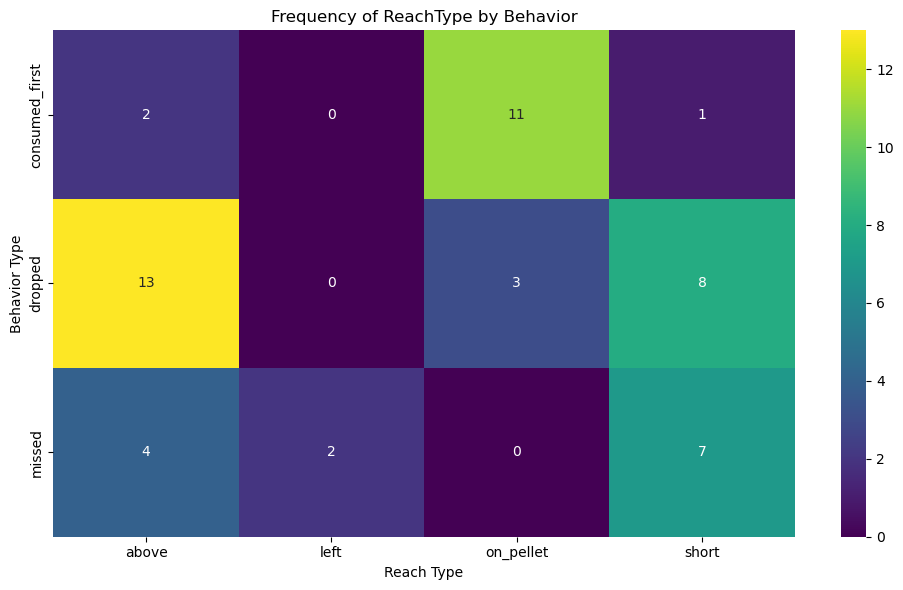

In [352]:

file_name = 'reachType_by_behavior.png'
# Assuming you already have session_df loaded
# If not: session_df = pd.read_excel("your_file.xlsx")

# Create a crosstab of behaviors and ReachType
cross_tab = pd.crosstab(df_final['behaviors'], df_final['ReachType'])

# Set up the plot
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="viridis")

# Titles and labels
plt.title("Frequency of ReachType by Behavior")
plt.ylabel("Behavior Type")
plt.xlabel("Reach Type")

# Adjust layout for better spacing
plt.tight_layout()


if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)
# Show the plot
plt.show()


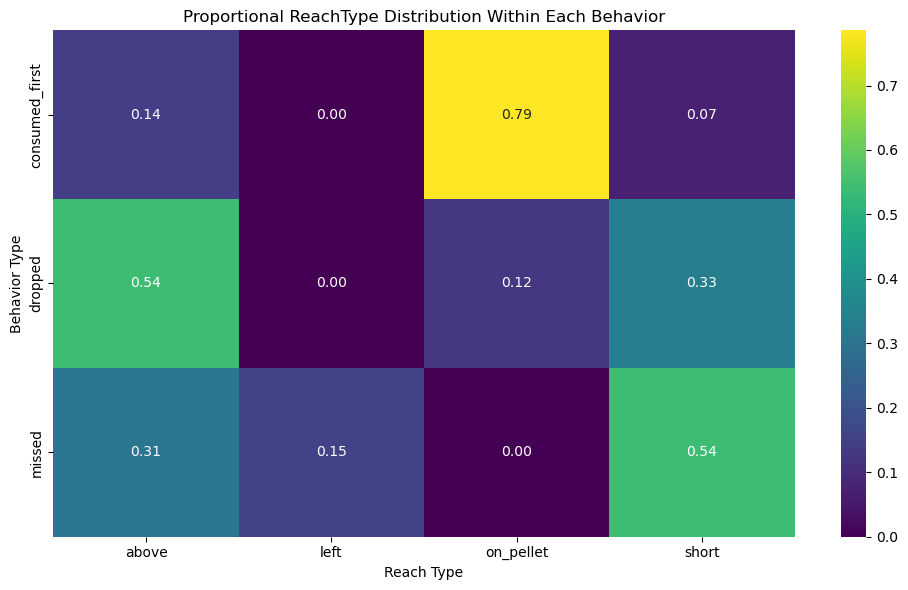

In [353]:
file_name = 'normalized_cross_tab_behavior_reachType.png'

# Normalize by row (behavior)
normalized_cross_tab = pd.crosstab(df_final['behaviors'], df_final['ReachType'], normalize='index')

plt.figure(figsize=(10, 6))
sns.heatmap(normalized_cross_tab, annot=True, fmt=".2f", cmap="viridis")
plt.title("Proportional ReachType Distribution Within Each Behavior")
plt.ylabel("Behavior Type")
plt.xlabel("Reach Type")
plt.tight_layout()


if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)
    
plt.show()


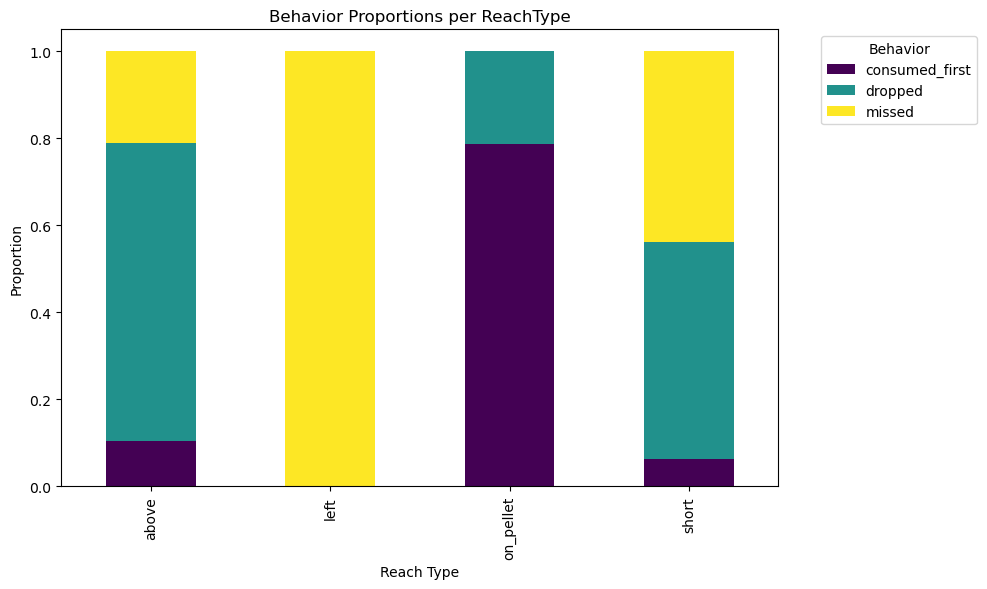

In [354]:
file_name = 'bar_plots_behavior_proportions.png'

# Group and normalize
behavior_reach_counts = pd.crosstab(df_final['ReachType'], df_final['behaviors'], normalize='index')

# Plot as stacked bars
behavior_reach_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title("Behavior Proportions per ReachType")
plt.ylabel("Proportion")
plt.xlabel("Reach Type")
plt.legend(title="Behavior", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)

plt.show()


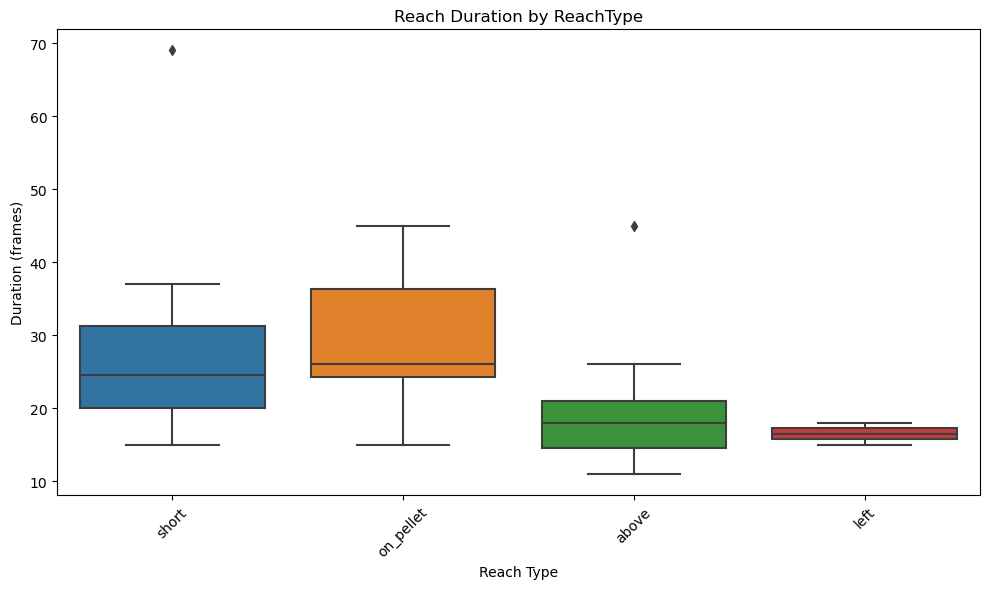

In [355]:
file_name = 'reach_duration_by_reachType.png'

# Example: Plot reach duration (reachEnd - reachInit) by ReachType
df_final['reachDuration'] = df_final['reachEnd'] - df_final['reachInit']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final, x='ReachType', y='reachDuration')
plt.title("Reach Duration by ReachType")
plt.ylabel("Duration (frames)")
plt.xlabel("Reach Type")
plt.xticks(rotation=45)
plt.tight_layout()

if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)

plt.show()


In [356]:
df_final_reachDuration_load.columns

Index(['T6000', 'T5000', 'reachInit', 'reachMax', 'reachEnd', 'stim',
       'behaviors', 'pellet_delivery', 'pellet_detected', 'ReachType',
       'reachDuration', 'movementTime', 'ReachInit_latency'],
      dtype='object')

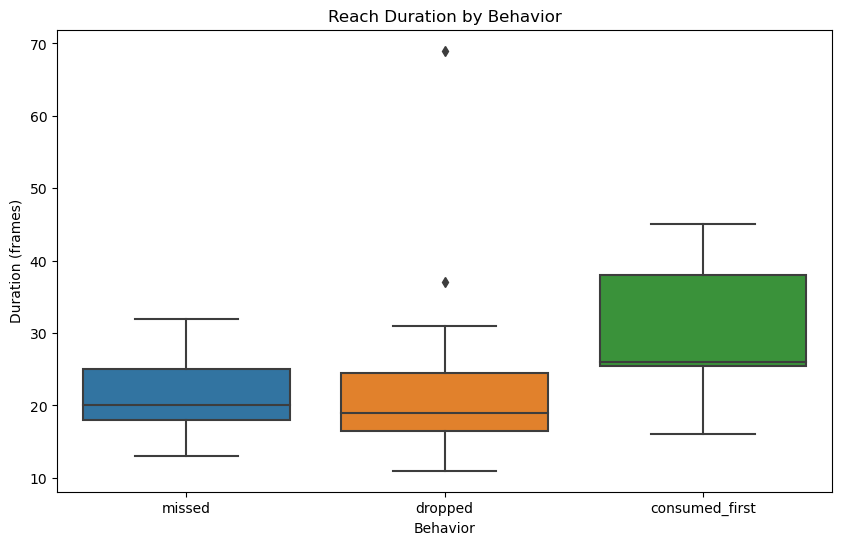

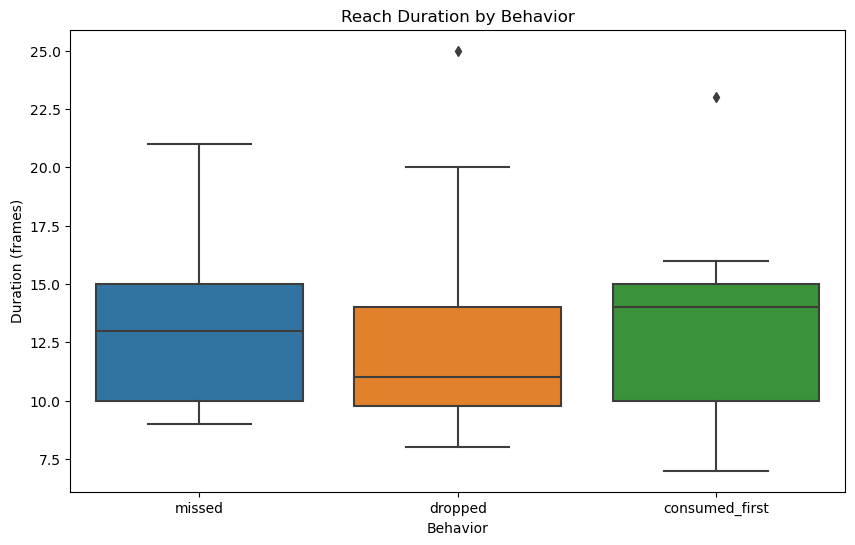

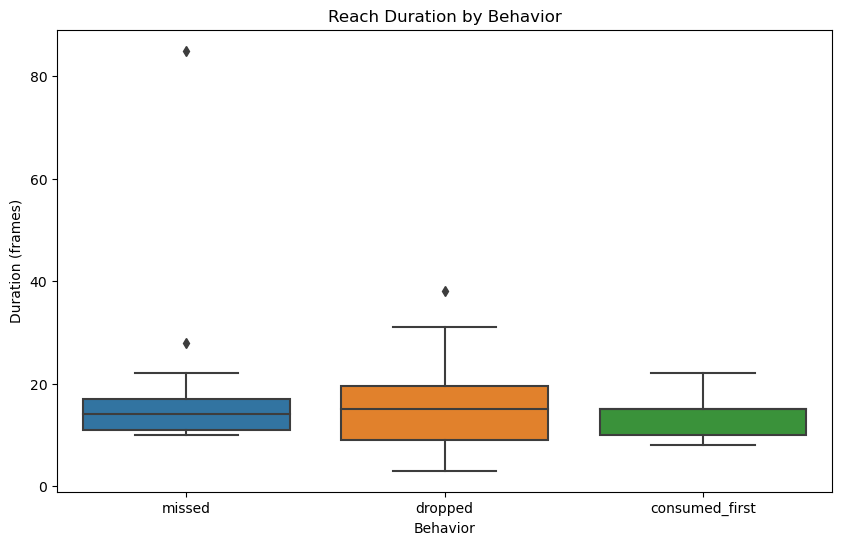

In [357]:
file_name = 'reach_duration_by_behavior.png'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final_reachDuration_load, x='behaviors', y='reachDuration')
plt.title("Reach Duration by Behavior")
plt.ylabel("Duration (frames)")
plt.xlabel("Behavior")
# Save plot
if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)
plt.show()

file_name = 'movementTime_by_reachType.png'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final_reachDuration_load, x='behaviors', y='movementTime')
plt.title("Reach Duration by Behavior")
plt.ylabel("Duration (frames)")
plt.xlabel("Behavior")
# Save plot
if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)
plt.show()

file_name = 'ReachInit_latency_by_reachType.png'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final_reachDuration_load, x='behaviors', y='ReachInit_latency')
plt.title("Reach Duration by Behavior")
plt.ylabel("Duration (frames)")
plt.xlabel("Behavior")
# Save plot
if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)
plt.show()

c:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


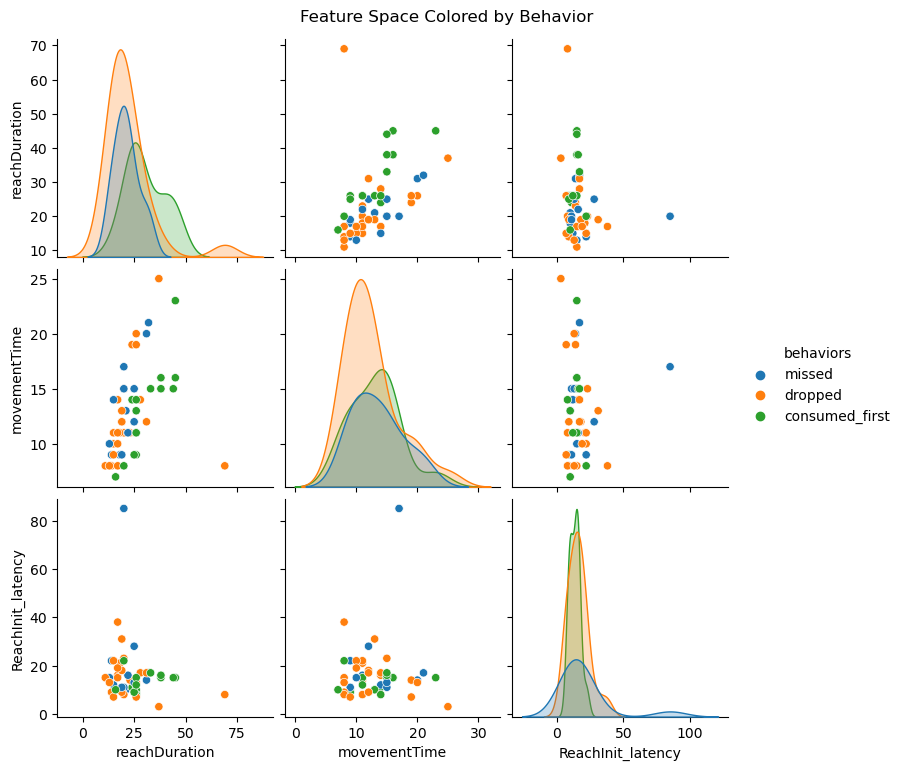

In [358]:
file_name = 'reach_durations_by_behavior.png'
# Optionally encode behavior and ReachType as colors
sns.pairplot(df_final_reachDuration_load, hue='behaviors', vars=['reachDuration', 'movementTime', 'ReachInit_latency'])
plt.suptitle("Feature Space Colored by Behavior", y=1.02)

# Save plot
if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)

plt.show()


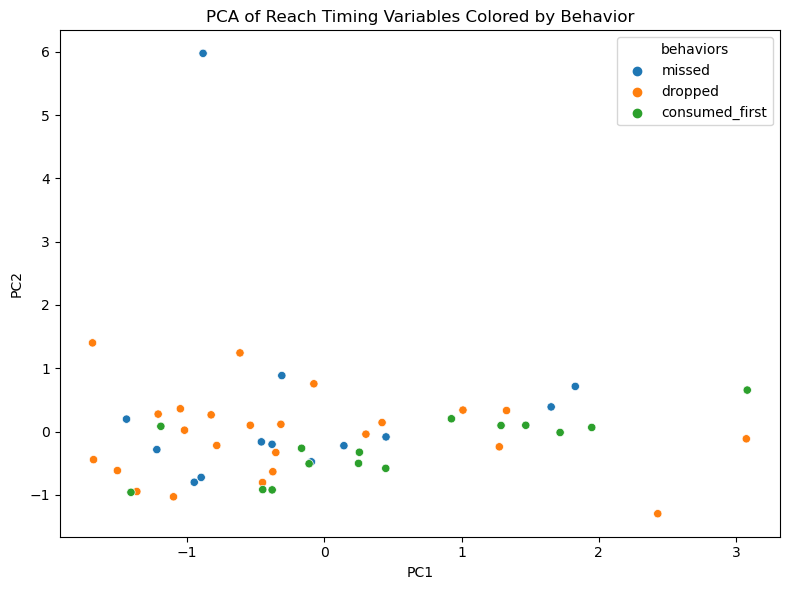

In [359]:
file_name = 'reach_duration_by_behavior_2D.png'


# Select and scale timing features
X = df_final_reachDuration_load[['reachDuration', 'movementTime', 'ReachInit_latency']]
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Plot
df_pca = df_final_reachDuration_load.copy()
df_pca['PC1'] = pca_result[:, 0]
df_pca['PC2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='behaviors')
plt.title('PCA of Reach Timing Variables Colored by Behavior')
plt.tight_layout()

# Save plot
if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)

plt.show()


c:\Users\user\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


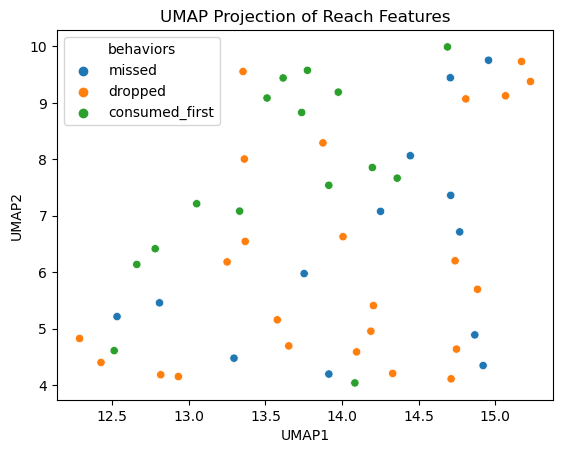

In [360]:
import umap
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select features including reachDuration
X = df_final_reachDuration_load[['reachDuration', 'movementTime', 'ReachInit_latency']]  # or add 'ReachInit_latency'

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# UMAP
umap_model = umap.UMAP(random_state=42)
umap_result = umap_model.fit_transform(X_scaled)

# Add to DataFrame
df_final_reachDuration_load['UMAP1'] = umap_result[:, 0]
df_final_reachDuration_load['UMAP2'] = umap_result[:, 1]

# Plot
sns.scatterplot(data=df_final_reachDuration_load, x='UMAP1', y='UMAP2', hue='behaviors')
plt.title("UMAP Projection of Reach Features")
plt.show()



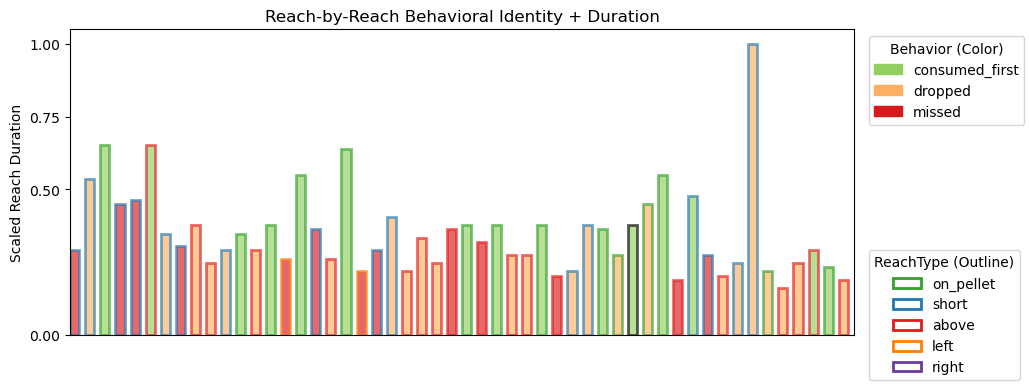

In [361]:
file_name = 'reach-by-reach_barPlot_small.png'

behavior_palette = {
    'consumed_first': '#91cf60',  # soft green
    'dropped': '#fdae61',         # peach/orange
    'missed': '#d7191c',          # soft red
}

reachtype_palette = {
    'on_pellet': '#33a02c',   # vivid blue
    'short':     '#1f78b4',   # strong green
    'above':     '#e31a1c',   # red
    'left':      '#ff7f00',   # orange
    'right':     '#6a3d9a',   # purple
}



fig, ax = plt.subplots(figsize=(len(df_final) * 0.2, 4))

# Normalize reachDuration to control bar height
max_duration = df_final_reachDuration_load['reachDuration'].max()
df_final_reachDuration_load['norm_duration'] = df_final_reachDuration_load['reachDuration'] / max_duration



    # Draw vertical bars
for i, row in df_final_reachDuration_load.iterrows():
    behavior_color = behavior_palette.get(row['behaviors'], 'gray')
    edge_color = reachtype_palette.get(row['ReachType'], 'black')
    
    ax.add_patch(patches.Rectangle(
        (i, 0),
        width=0.60,
        height=row['norm_duration'],
        facecolor=behavior_color,
        edgecolor=edge_color,
        linewidth=2,
        alpha=0.65 # ensure solid fill
    ))

# 🔳 Add faint vertical gridlines between each bar
for i in range(len(df_final_reachDuration_load)):
    ax.axvline(i, color='white', lw=0, zorder=0)

# Axis settings
ax.set_xlim(0, len(df_final_reachDuration_load))
ax.set_ylim(0, 1.05)
ax.set_xticks([])
ax.set_yticks([0, 0.5, 0.75, 1])
ax.set_ylabel('Scaled Reach Duration')
ax.set_title('Reach-by-Reach Behavioral Identity + Duration')

# Legends
behavior_legend = [patches.Patch(color=c, label=l) for l, c in behavior_palette.items()]
reachtype_legend = [patches.Patch(edgecolor=c, facecolor='white', linewidth=2, label=l) for l, c in reachtype_palette.items()]

# Add legends
legend1 = ax.legend(handles=behavior_legend, title='Behavior (Color)', bbox_to_anchor=(1.01, 1), loc='upper left')
ax.add_artist(legend1)
ax.legend(handles=reachtype_legend, title='ReachType (Outline)', bbox_to_anchor=(1.01, 0.3), loc='upper left')

plt.tight_layout()

# Save plot
if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)

plt.show()


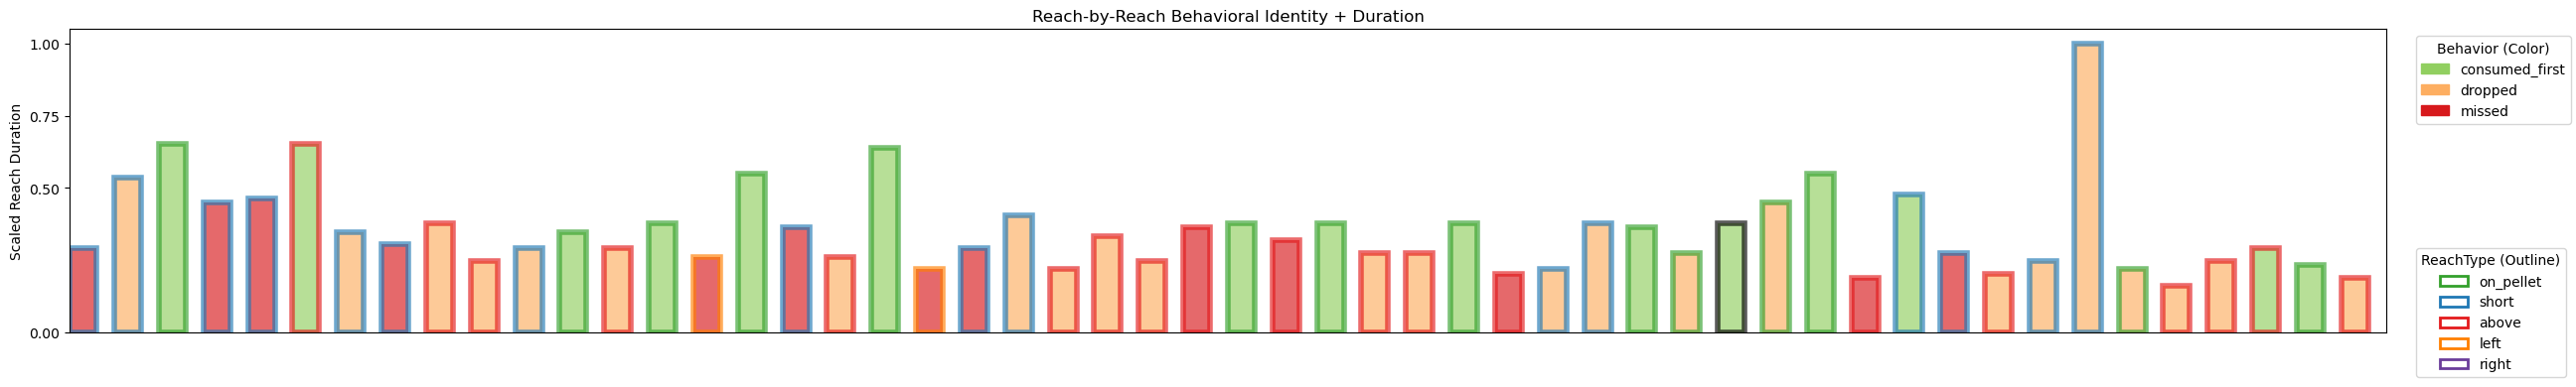

In [362]:
file_name = 'reach-by-reach_barPlot_medium.png'


# Setup color palettes
behavior_palette = dict(zip(df_final['behaviors'].dropna().unique(), sns.color_palette('Set2')))
reachtype_palette = dict(zip(df_final['ReachType'].dropna().unique(), sns.color_palette('Set1')))


behavior_palette = {
    'consumed_first': '#91cf60',  # soft green
    'dropped': '#fdae61',         # peach/orange
    'missed': '#d7191c',          # soft red
}

reachtype_palette = {
    'on_pellet': '#33a02c',   # vivid blue
    'short':     '#1f78b4',   # strong green
    'above':     '#e31a1c',   # red
    'left':      '#ff7f00',   # orange
    'right':     '#6a3d9a',   # purple
}
#33a02c
fig, ax = plt.subplots(figsize=(len(df_final) * 0.5, 4))

# Normalize reachDuration to control bar height
max_duration = df_final_reachDuration_load['reachDuration'].max()
df_final_reachDuration_load['norm_duration'] = df_final_reachDuration_load['reachDuration'] / max_duration



    # Draw vertical bars
for i, row in df_final_reachDuration_load.iterrows():
    behavior_color = behavior_palette.get(row['behaviors'], 'gray')
    edge_color = reachtype_palette.get(row['ReachType'], 'black')
    
    ax.add_patch(patches.Rectangle(
        (i, 0),
        width=0.60,
        height=row['norm_duration'],
        facecolor=behavior_color,
        edgecolor=edge_color,
        linewidth=4,
        alpha=0.65 # ensure solid fill
    ))

# 🔳 Add faint vertical gridlines between each bar
for i in range(len(df_final_reachDuration_load)):
    ax.axvline(i, color='white', lw=0, zorder=0)

# Axis settings
ax.set_xlim(0, len(df_final_reachDuration_load))
ax.set_ylim(0, 1.05)
ax.set_xticks([])
ax.set_yticks([0, 0.5, 0.75, 1])
ax.set_ylabel('Scaled Reach Duration')
ax.set_title('Reach-by-Reach Behavioral Identity + Duration')

# Legends
behavior_legend = [patches.Patch(color=c, label=l) for l, c in behavior_palette.items()]
reachtype_legend = [patches.Patch(edgecolor=c, facecolor='white', linewidth=2, label=l) for l, c in reachtype_palette.items()]

# Add legends
legend1 = ax.legend(handles=behavior_legend, title='Behavior (Color)', bbox_to_anchor=(1.01, 1), loc='upper left')
ax.add_artist(legend1)
ax.legend(handles=reachtype_legend, title='ReachType (Outline)', bbox_to_anchor=(1.01, 0.3), loc='upper left')

plt.tight_layout()


# Save plot
if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)
    
plt.show()


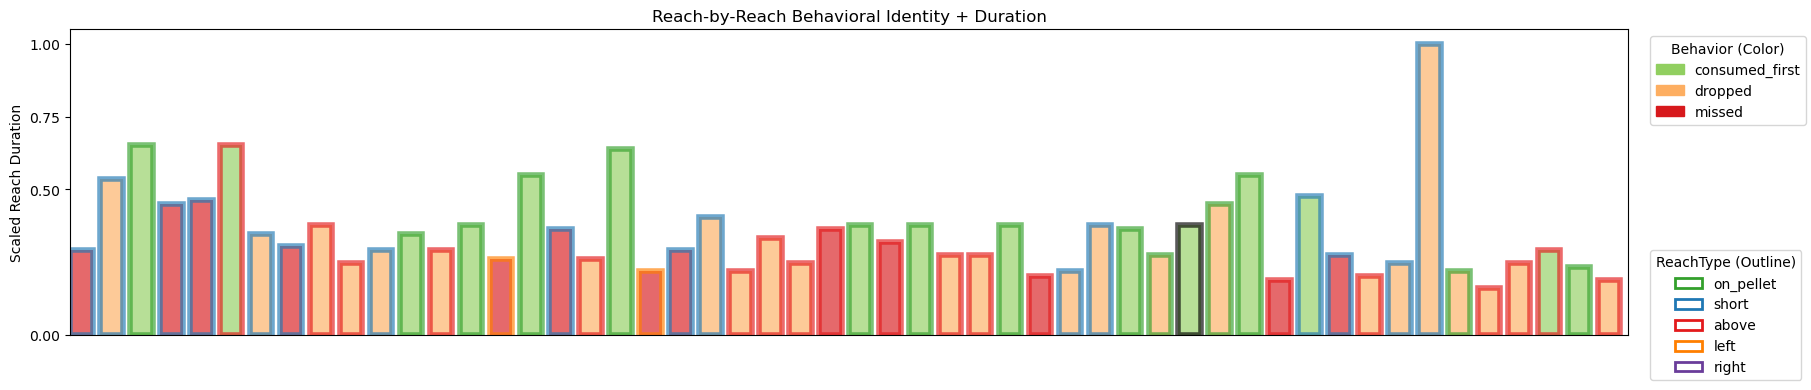

In [363]:
file_name = 'reach-by-reach_barPlot_large.png'


# Setup color palettes
behavior_palette = dict(zip(df_final['behaviors'].dropna().unique(), sns.color_palette('Set2')))
reachtype_palette = dict(zip(df_final['ReachType'].dropna().unique(), sns.color_palette('Set1')))


behavior_palette = {
    'consumed_first': '#91cf60',  # soft green
    'dropped': '#fdae61',         # peach/orange
    'missed': '#d7191c',          # soft red
}

reachtype_palette = {
    'on_pellet': '#33a02c',   # vivid blue
    'short':     '#1f78b4',   # strong green
    'above':     '#e31a1c',   # red
    'left':      '#ff7f00',   # orange
    'right':     '#6a3d9a',   # purple
}
#33a02c
fig, ax = plt.subplots(figsize=(len(df_final) * 0.35, 4))

# Normalize reachDuration to control bar height
max_duration = df_final_reachDuration_load['reachDuration'].max()
df_final_reachDuration_load['norm_duration'] = df_final_reachDuration_load['reachDuration'] / max_duration



    # Draw vertical bars
for i, row in df_final_reachDuration_load.iterrows():
    behavior_color = behavior_palette.get(row['behaviors'], 'gray')
    edge_color = reachtype_palette.get(row['ReachType'], 'black')
    
    ax.add_patch(patches.Rectangle(
        (i, 0),
        width=0.75,
        height=row['norm_duration'],
        facecolor=behavior_color,
        edgecolor=edge_color,
        linewidth=4,
        alpha=0.65 # ensure solid fill
    ))

# 🔳 Add faint vertical gridlines between each bar
for i in range(len(df_final_reachDuration_load)):
    ax.axvline(i, color='white', lw=0, zorder=0)

# Axis settings
ax.set_xlim(0, len(df_final_reachDuration_load))
ax.set_ylim(0, 1.05)
ax.set_xticks([])
ax.set_yticks([0, 0.5, 0.75, 1])
ax.set_ylabel('Scaled Reach Duration')
ax.set_title('Reach-by-Reach Behavioral Identity + Duration')

# Legends
behavior_legend = [patches.Patch(color=c, label=l) for l, c in behavior_palette.items()]
reachtype_legend = [patches.Patch(edgecolor=c, facecolor='white', linewidth=2, label=l) for l, c in reachtype_palette.items()]

# Add legends
legend1 = ax.legend(handles=behavior_legend, title='Behavior (Color)', bbox_to_anchor=(1.01, 1), loc='upper left')
ax.add_artist(legend1)
ax.legend(handles=reachtype_legend, title='ReachType (Outline)', bbox_to_anchor=(1.01, 0.3), loc='upper left')

plt.tight_layout()


# Save plot
if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)
    
plt.show()


### Look at the behavior results 

In [364]:
df_consumed_first = df_final[df_final['behaviors']=='consumed_first']
df_dropped = df_final[df_final['behaviors']=='dropped']
df_missed = df_final[df_final['behaviors']=='missed']

In [365]:
df_consumed_first.head(5)

,T6000,T5000,reachInit,reachMax,reachEnd,stim,behaviors,pellet_delivery,pellet_detected,ReachType,reachDuration,movementTime,ReachInit_latency
2,6725,6858,6873,6889,6918,0,consumed_first,6856,6779,on_pellet,45,16,15
5,14405,14795,14810,14833,14855,0,consumed_first,14793,14492,above,45,23,15
11,36972,37252,37263,37277,37287,0,consumed_first,37250,37061,on_pellet,24,14,11
13,43848,44324,44333,44342,44359,0,consumed_first,44322,43939,on_pellet,26,9,9
15,48735,49018,49033,49049,49071,0,consumed_first,49016,48790,on_pellet,38,16,15


In [366]:
df_dropped.head(5)

,T6000,T5000,reachInit,reachMax,reachEnd,stim,behaviors,pellet_delivery,pellet_detected,ReachType,reachDuration,movementTime,ReachInit_latency
1,4229,4661,4664,4689,4701,0,dropped,4659,4283,short,37,25,3
6,16892,17207,17221,17240,17245,0,dropped,17205,16978,short,24,19,14
8,23610,24047,24060,24080,24086,0,dropped,24044,23664,above,26,20,13
9,28216,28351,28367,28381,28384,0,dropped,28349,28273,above,17,14,16
10,32525,32813,32821,32832,32841,0,dropped,32811,32582,short,20,11,8


In [367]:
df_missed.head(5)

,T6000,T5000,reachInit,reachMax,reachEnd,stim,behaviors,pellet_delivery,pellet_detected,ReachType,reachDuration,movementTime,ReachInit_latency
0,1816,2100,2185,2202,2205,0,missed,2098,1869,short,20,17,85
3,8911,9414,9428,9448,9459,0,missed,9412,8999,short,31,20,14
4,12129,12336,12353,12374,12385,0,missed,12333,12182,short,32,21,17
7,19305,19441,19451,19464,19472,0,missed,19439,19362,short,21,13,10
14,46399,46675,46685,46694,46703,0,missed,46673,46485,left,18,9,10
